# NYC Property Sales Price Predictions

Note: We will add our problem statement and project description (target variable, features, etc.) here.

In [0]:
#These are the packages we are importing for our analysis.

import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import math
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
link = 'https://drive.google.com/open?id=147GTGRGGQIcmJKe9Zd--qej05HAoJoX8'
fluff, id = link.split('=')
print (id)

147GTGRGGQIcmJKe9Zd--qej05HAoJoX8


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('nyc-rolling-sales.csv')  
df = pd.read_csv('nyc-rolling-sales.csv')

In [4]:
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
5,9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,,10009,20,0,20,2581,9730,1900,2,C4,-,2017-07-20 00:00:00
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,10009,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00
7,11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET,,10009,44,2,46,5163,21007,1900,2,C7,-,2017-07-20 00:00:00
8,12,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,,D5,141 AVENUE D,,10009,15,0,15,1534,9198,1920,2,D5,-,2017-06-20 00:00:00
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,10009,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00


## In the cells below we focus on cleaning up the data for our analysis.

In [5]:
df = df.drop(df.columns[0],axis = 1)
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [0]:
df.rename(columns={'BUILDING CLASS AT PRESENT': 'BUILDINGCLASSPRESENT', 'APARTMENT NUMBER': 'APARTMENTNUMBER', 'ZIP CODE': 'ZIPCODE', 'RESIDENTIAL UNITS': 'RESIDENTIALUNITS', 'COMMERCIAL UNITS': 'COMMERCIALUNITS', 'TOTAL UNITS': 'TOTALUNITS', 'LAND SQUARE FEET': 'LANDSQUAREFEET', 'GROSS SQUARE FEET': 'GROSSSQUAREFEET', 'YEAR BUILT': 'YEARBUILT', 'TAX CLASS AT TIME OF SALE': 'TAXCLASSTIMEOFSALE', 'BUILDING CLASS AT TIME OF SALE': 'BUILDINGCLASSTIMEOFSALE', 'SALE PRICE': 'SALEPRICE', 'SALE DATE': 'SALEDATE', 'BUILDING CLASS CATEGORY': 'BUILDINGCLASSCATEGORY','TAX CLASS AT PRESENT': 'TAXCLASSATPRESENT'}, inplace=True)

In [7]:
df["BUILDINGCLASSCATEGORYTRUNC"] = df["BUILDINGCLASSCATEGORY"].str[:2]
df.BUILDINGCLASSCATEGORYTRUNC = pd.to_numeric(df.BUILDINGCLASSCATEGORYTRUNC,errors='coerce')
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDINGCLASSCATEGORY,TAXCLASSATPRESENT,BLOCK,LOT,EASE-MENT,BUILDINGCLASSPRESENT,ADDRESS,APARTMENTNUMBER,ZIPCODE,RESIDENTIALUNITS,COMMERCIALUNITS,TOTALUNITS,LANDSQUAREFEET,GROSSSQUAREFEET,YEARBUILT,TAXCLASSTIMEOFSALE,BUILDINGCLASSTIMEOFSALE,SALEPRICE,SALEDATE,BUILDINGCLASSCATEGORYTRUNC
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00,7
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00,7
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00,7
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00,7
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00,7


In [8]:
df = df[~(df['BUILDINGCLASSCATEGORYTRUNC'] > 20)]
df.shape

(78263, 22)

In [9]:
df = df[df.SALEPRICE != " -  "]
df.shape

(65732, 22)

In [10]:
df.SALEPRICE = pd.to_numeric(df.SALEPRICE,errors='coerce')
df = df[~(df['SALEPRICE'] < 75000)]
df = df[~(df['SALEPRICE'] > 1000000)]
df.shape

(41099, 22)

In [0]:
df['AVGPRICEBOROUGH'] = df.groupby([pd.Grouper(key='BOROUGH')])['SALEPRICE'].transform('mean')
df['AVGPRICEZIPCODE'] = df.groupby([pd.Grouper(key='ZIPCODE')])['SALEPRICE'].transform('mean')
df['AVGPRICEBLOCK'] = df.groupby([pd.Grouper(key='BLOCK')])['SALEPRICE'].transform('mean')

In [12]:
df['LN_PRICE'] = np.log(df['SALEPRICE'])
df

,BOROUGH,NEIGHBORHOOD,BUILDINGCLASSCATEGORY,TAXCLASSATPRESENT,BLOCK,LOT,EASE-MENT,BUILDINGCLASSPRESENT,ADDRESS,APARTMENTNUMBER,ZIPCODE,RESIDENTIALUNITS,COMMERCIALUNITS,TOTALUNITS,LANDSQUAREFEET,GROSSSQUAREFEET,YEARBUILT,TAXCLASSTIMEOFSALE,BUILDINGCLASSTIMEOFSALE,SALEPRICE,SALEDATE,BUILDINGCLASSCATEGORYTRUNC,AVGPRICEBOROUGH,AVGPRICEZIPCODE,AVGPRICEBLOCK,LN_PRICE
13,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 1C",,10009,0,0,0,-,-,1920,2,C6,499000,2017-03-10 00:00:00,9,639944.152265,618307.337209,526809.230769,13.120361
15,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3RD STREET, 5A",,10009,0,0,0,-,-,1920,2,C6,529500,2017-06-09 00:00:00,9,639944.152265,618307.337209,526809.230769,13.179688
16,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 2E",,10009,0,0,0,-,-,1920,2,C6,423000,2017-07-14 00:00:00,9,639944.152265,618307.337209,526809.230769,12.955127
17,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,46,,C6,"317 EAST 3RD STREET, 12",,10009,0,0,0,-,-,1925,2,C6,501000,2017-03-16 00:00:00,9,639944.152265,618307.337209,526809.230769,13.124361
18,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,49,,C6,"311 EAST 3RD STREET, 17",,10009,0,0,0,-,-,1920,2,C6,450000,2016-09-01 00:00:00,9,639944.152265,618307.337209,526809.230769,13.017003
19,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,49,,C6,"311 EAST 3RD, 22",,10009,0,0,0,-,-,1920,2,C6,510000,2017-08-17 00:00:00,9,639944.152265,618307.337209,526809.230769,13.142166
21,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,375,30,,C6,"742 EAST 6TH STREET, 1",,10009,0,0,0,-,-,1902,2,C6,350000,2017-08-30 00:00:00,9,639944.152265,618307.337209,678333.333333,12.765688
24,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,376,16,,C6,"248 EAST 7TH STREET, 24",,10009,0,0,0,-,-,1928,2,C6,350000,2017-01-30 00:00:00,9,639944.152265,618307.337209,552075.666667,12.765688
25,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,376,16,,C6,"248 EAST 7TH STREET, 2",,10009,0,0,0,-,-,1928,2,C6,404000,2017-07-07 00:00:00,9,639944.152265,618307.337209,552075.666667,12.909170
26,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,376,19,,C6,"254 EAST 7TH STREET, 4",,10009,0,0,0,-,-,1910,2,C6,535000,2017-06-21 00:00:00,9,639944.152265,618307.337209,552075.666667,13.190022


## Here we converted the variables for each feature into columns with binary variables using get_dummies.

In [13]:
df = pd.get_dummies(df, columns=['ZIPCODE','BOROUGH','NEIGHBORHOOD','BUILDINGCLASSCATEGORY','TAXCLASSATPRESENT','BUILDINGCLASSPRESENT','YEARBUILT','TAXCLASSTIMEOFSALE','BUILDINGCLASSTIMEOFSALE'])
df.head()

,BLOCK,LOT,EASE-MENT,ADDRESS,APARTMENTNUMBER,RESIDENTIALUNITS,COMMERCIALUNITS,TOTALUNITS,LANDSQUAREFEET,GROSSSQUAREFEET,SALEPRICE,SALEDATE,BUILDINGCLASSCATEGORYTRUNC,AVGPRICEBOROUGH,AVGPRICEZIPCODE,AVGPRICEBLOCK,LN_PRICE,ZIPCODE_0,ZIPCODE_10001,ZIPCODE_10002,ZIPCODE_10003,ZIPCODE_10004,ZIPCODE_10005,ZIPCODE_10006,ZIPCODE_10007,ZIPCODE_10009,ZIPCODE_10010,ZIPCODE_10011,ZIPCODE_10012,ZIPCODE_10013,ZIPCODE_10014,ZIPCODE_10016,ZIPCODE_10017,ZIPCODE_10018,ZIPCODE_10019,ZIPCODE_10021,ZIPCODE_10022,ZIPCODE_10023,ZIPCODE_10024,ZIPCODE_10025,...,BUILDINGCLASSTIMEOFSALE_A9,BUILDINGCLASSTIMEOFSALE_B1,BUILDINGCLASSTIMEOFSALE_B2,BUILDINGCLASSTIMEOFSALE_B3,BUILDINGCLASSTIMEOFSALE_B9,BUILDINGCLASSTIMEOFSALE_C0,BUILDINGCLASSTIMEOFSALE_C1,BUILDINGCLASSTIMEOFSALE_C2,BUILDINGCLASSTIMEOFSALE_C3,BUILDINGCLASSTIMEOFSALE_C4,BUILDINGCLASSTIMEOFSALE_C5,BUILDINGCLASSTIMEOFSALE_C6,BUILDINGCLASSTIMEOFSALE_C7,BUILDINGCLASSTIMEOFSALE_C8,BUILDINGCLASSTIMEOFSALE_C9,BUILDINGCLASSTIMEOFSALE_CM,BUILDINGCLASSTIMEOFSALE_D0,BUILDINGCLASSTIMEOFSALE_D4,BUILDINGCLASSTIMEOFSALE_D6,BUILDINGCLASSTIMEOFSALE_G0,BUILDINGCLASSTIMEOFSALE_R0,BUILDINGCLASSTIMEOFSALE_R1,BUILDINGCLASSTIMEOFSALE_R2,BUILDINGCLASSTIMEOFSALE_R3,BUILDINGCLASSTIMEOFSALE_R4,BUILDINGCLASSTIMEOFSALE_R6,BUILDINGCLASSTIMEOFSALE_R8,BUILDINGCLASSTIMEOFSALE_R9,BUILDINGCLASSTIMEOFSALE_RR,BUILDINGCLASSTIMEOFSALE_S0,BUILDINGCLASSTIMEOFSALE_S1,BUILDINGCLASSTIMEOFSALE_S2,BUILDINGCLASSTIMEOFSALE_S3,BUILDINGCLASSTIMEOFSALE_S4,BUILDINGCLASSTIMEOFSALE_S5,BUILDINGCLASSTIMEOFSALE_S9,BUILDINGCLASSTIMEOFSALE_V0,BUILDINGCLASSTIMEOFSALE_V2,BUILDINGCLASSTIMEOFSALE_V3,BUILDINGCLASSTIMEOFSALE_Z0
13,373,40,,"327 EAST 3 STREET, 1C",,0,0,0,-,-,499000,2017-03-10 00:00:00,9,639944.152265,618307.337209,526809.230769,13.120361,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,373,40,,"327 EAST 3RD STREET, 5A",,0,0,0,-,-,529500,2017-06-09 00:00:00,9,639944.152265,618307.337209,526809.230769,13.179688,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16,373,40,,"327 EAST 3 STREET, 2E",,0,0,0,-,-,423000,2017-07-14 00:00:00,9,639944.152265,618307.337209,526809.230769,12.955127,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17,373,46,,"317 EAST 3RD STREET, 12",,0,0,0,-,-,501000,2017-03-16 00:00:00,9,639944.152265,618307.337209,526809.230769,13.124361,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18,373,49,,"311 EAST 3RD STREET, 17",,0,0,0,-,-,450000,2016-09-01 00:00:00,9,639944.152265,618307.337209,526809.230769,13.017003,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Decision Tree Regressor Model

In [0]:
X = df[df.columns.difference(['BLOCK', 'LOT', 'EASE-MENT', 'ADDRESS', 'APARTMENTNUMBER', 'SALEPRICE', 'SALEDATE', 'BUILDINGCLASSCATEGORYTRUNC', 'LANDSQUAREFEET', 'GROSSSQUAREFEET'])]
Y = df['SALEPRICE']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=42)

In [21]:
#https://www.python-course.eu/Regression_Trees.php
#Import the regression tree model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

#Parametrize the model
#We will use the mean squared error == variance as spliting criteria and set the minimum number of instances per leaf = 5

regression_model = DecisionTreeRegressor(criterion="mse",min_samples_leaf=5)

#Fit the model
regression_model.fit(X_train,Y_train)

#Predict unseen query instances
predicted = regression_model.predict(X_test)

#Compute and plot the RMSE
RMSE = np.sqrt(np.sum(((Y_test-predicted)**2)/len(Y_test)))
RMSE

132.1244601863867

In [0]:
#Fit the model
regression_model.fit(X_train,Y_train)

#Predict unseen query instances
predicted = regression_model.predict(X_test)

#Compute and plot the RMSE
RMSE = np.sqrt(np.sum(((Y_test-predicted)**2)/len(Y_test)))
RMSE

2811.4834573208054

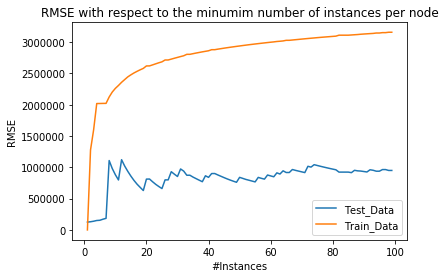

In [0]:
fig = plt.figure()
ax0 = fig.add_subplot(111) 
RMSE_train = []
RMSE_test = []
for i in range(1,100):
    #Paramterize the model and let i be the number of minimum instances per leaf node
    regression_model = DecisionTreeRegressor(criterion="mse",min_samples_leaf=i)   
    #Train the model
    regression_model.fit(X_train,Y_train)
    #Predict query instances
    predicted_train = regression_model.predict(X_train)
    predicted_test = regression_model.predict(X_test)
    #Calculate and append the RMSEs
    RMSE_train.append(np.sqrt(np.sum(((Y_train-predicted_train)**2)/len(Y_train))))
    RMSE_test.append(np.sqrt(np.sum(((Y_test-predicted_test)**2)/len(Y_test))))
   
ax0.plot(range(1,100),RMSE_test,label='Test_Data')
ax0.plot(range(1,100),RMSE_train,label='Train_Data')
ax0.legend()
ax0.set_title('RMSE with respect to the minumum number of instances per node')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('RMSE')
plt.show()

In [0]:
errors = abs(predicted - Y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'dollars.')

Mean Absolute Error: 447.91 dollars.


In [0]:
mape = 100 * (errors / Y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.98 %.


In [0]:
regression_model = DecisionTreeRegressor(criterion="mse",max_depth=7)

#Fit the model
regression_model.fit(X_train,Y_train)

#Predict unseen query instances
predicted = regression_model.predict(X_test)

#Compute and plot the RMSE
RMSE = np.sqrt(np.sum(((Y_test-predicted)**2)/len(Y_test)))
RMSE

11968.057997358224

In [0]:
errors = abs(predicted - Y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'dollars.')

Mean Absolute Error: 8964.76 dollars.


In [0]:
mape = 100 * (errors / Y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 98.33 %.


In [0]:
X = df[df.columns.difference(['BLOCK', 'LOT', 'EASE-MENT', 'ADDRESS', 'APARTMENTNUMBER', 'SALEPRICE', 'SALEDATE', 'BUILDINGCLASSCATEGORYTRUNC', 'LANDSQUAREFEET', 'GROSSSQUAREFEET', 'AVGPRICEBOROUGH', 'AVGPRICEZIPCODE', 'AVGPRICEBLOCK', 'LN_PRICE'])]
Y = df['SALEPRICE']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=42)


regression_model = DecisionTreeRegressor(criterion="mse",max_depth=5)

#Fit the model
regression_model.fit(X_train,Y_train)

#Predict unseen query instances
predicted = regression_model.predict(X_test)


In [0]:
errors = abs(predicted - Y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'dollars.')

Mean Absolute Error: 488693.7 dollars.


In [0]:
mape = 100 * (errors / Y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 29.63 %.


In [0]:
X = df[df.columns.difference(['BLOCK', 'LOT', 'EASE-MENT', 'ADDRESS', 'APARTMENTNUMBER', 'SALEPRICE', 'SALEDATE', 'BUILDINGCLASSCATEGORYTRUNC', 'LANDSQUAREFEET', 'GROSSSQUAREFEET', 'AVGPRICEBOROUGH', 'AVGPRICEBLOCK', 'LN_PRICE'])]
Y = df['SALEPRICE']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=42)


regression_model = DecisionTreeRegressor(criterion="mse",max_depth=5)

#Fit the model
regression_model.fit(X_train,Y_train)

#Predict unseen query instances
predicted = regression_model.predict(X_test)


In [0]:
errors = abs(predicted - Y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'dollars.')

Mean Absolute Error: 451264.31 dollars.


In [0]:
mape = 100 * (errors / Y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 36.67 %.


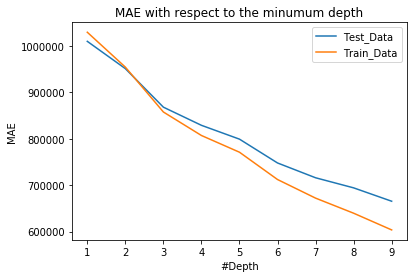

In [0]:
fig = plt.figure()
ax0 = fig.add_subplot(111) 
MAE_train = []
MAE_test = []
for i in range(1,10):
    #Paramterize the model and let i be the number of minimum instances per leaf node
    regression_model = DecisionTreeRegressor(criterion="mse",max_depth=i)   
    #Train the model
    regression_model.fit(X_train,Y_train)
    #Predict query instances
    predicted_train = regression_model.predict(X_train)
    predicted_test = regression_model.predict(X_test)
    #Calculate and append the MAEs
    errors_train = abs(predicted_train - Y_train)
    errors_test = abs(predicted_test - Y_test)
    MAE_train.append(round(np.mean(errors_train), 2))
    MAE_test.append(round(np.mean(errors_test), 2))
   
ax0.plot(range(1,10),MAE_test,label='Test_Data')
ax0.plot(range(1,10),MAE_train,label='Train_Data')
ax0.legend()
ax0.set_title('MAE with respect to the minumum depth')
ax0.set_xlabel('#Depth')
ax0.set_ylabel('MAE')
plt.show()

In [0]:
X = df[df.columns.difference(['BLOCK', 'LOT', 'EASE-MENT', 'ADDRESS', 'APARTMENTNUMBER', 'SALEPRICE', 'SALEDATE', 'BUILDINGCLASSCATEGORYTRUNC', 'LANDSQUAREFEET', 'GROSSSQUAREFEET', 'AVGPRICEBOROUGH', 'AVGPRICEZIPCODE', 'AVGPRICEBLOCK', 'LN_PRICE'])]
Y = df['SALEPRICE']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=42)


regression_model = DecisionTreeRegressor(criterion="mse",max_depth=5)

#Fit the model
regression_model.fit(X_train,Y_train)

#Predict unseen query instances
predicted = regression_model.predict(X_test)


In [33]:
errors = abs(predicted - Y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'dollars.')

Mean Absolute Error: 153691.74 dollars.


In [34]:
mape = 100 * (errors / Y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 58.68 %.


In [0]:
X = df[df.columns.difference(['BLOCK', 'LOT', 'EASE-MENT', 'ADDRESS', 'APARTMENTNUMBER', 'SALEPRICE', 'SALEDATE', 'BUILDINGCLASSCATEGORYTRUNC', 'LANDSQUAREFEET', 'GROSSSQUAREFEET', 'AVGPRICEBOROUGH', 'AVGPRICEZIPCODE', 'AVGPRICEBLOCK', 'LN_PRICE'])]
Y = df['SALEPRICE']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=42)


regression_model = DecisionTreeRegressor(criterion="mse",max_depth=7)

#Fit the model
regression_model.fit(X_train,Y_train)

#Predict unseen query instances
predicted = regression_model.predict(X_test)


In [36]:
errors = abs(predicted - Y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'dollars.')

Mean Absolute Error: 147144.67 dollars.


In [37]:
mape = 100 * (errors / Y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 60.69 %.


In [0]:
X = df[df.columns.difference(['BLOCK', 'LOT', 'EASE-MENT', 'ADDRESS', 'APARTMENTNUMBER', 'SALEPRICE', 'SALEDATE', 'BUILDINGCLASSCATEGORYTRUNC', 'LANDSQUAREFEET', 'GROSSSQUAREFEET', 'AVGPRICEBOROUGH', 'AVGPRICEZIPCODE', 'AVGPRICEBLOCK', 'LN_PRICE'])]
Y = df['SALEPRICE']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=42)


regression_model = DecisionTreeRegressor(criterion="mse",max_depth=6)

#Fit the model
regression_model.fit(X_train,Y_train)

#Predict unseen query instances
predicted = regression_model.predict(X_test)


In [39]:
errors = abs(predicted - Y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'dollars.')

Mean Absolute Error: 150507.86 dollars.


In [40]:
mape = 100 * (errors / Y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 59.65 %.


In [41]:
regression_model = DecisionTreeRegressor(criterion="mse",max_depth=10)

#Fit the model
regression_model.fit(X_train,Y_train)

#Predict unseen query instances
predicted = regression_model.predict(X_test)

errors = abs(predicted - Y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'dollars.')

mape = 100 * (errors / Y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 140133.26 dollars.
Accuracy: 62.35 %.
